<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/graficos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('laptop.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df["Price"] = df["Price"].replace({r"[₹,]": ""}, regex=True).astype(float)

In [ ]:
df['Ram_teste'] = df['Ram'].str.extract(r"(\d+)")

In [ ]:
df = df.rename(columns={"Ram_teste":"Ram_qtd"})

In [ ]:
def parse_ssd(ssd_str):
    if pd.isna(ssd_str):
        return 0
    if 'TB' in ssd_str:
        return float(re.search(r"(\d+)", ssd_str).group(1)) * 1024
    elif 'GB' in ssd_str:
        return float(re.search(r"(\d+)", ssd_str).group(1))
    return 0

In [ ]:
df['SSD_size'] = df['SSD'].apply(parse_ssd)

In [ ]:
df['Graphics_brand'] = df['Graphics'].str.extract(r"(NVIDIA|AMD|Intel)", expand=False)

In [ ]:
df['Processor_gen'] = df['Generation'].str.extract(r'(\d+)(?:st|nd|rd|th)')

In [ ]:
df["Display Size"] = df["Display"].str.extract(r"(\d{2}\.?\d*)").astype(float)

In [ ]:
top10_mais_caros = df.nlargest(10,'Price')
top10_mais_caros.head(2)

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_qtd,SSD_size,Graphics_brand,Processor_gen,Display Size
65,MSI Titan 18 HX Gaming Laptop (14th Gen Core i...,599990.0,NaN,14th Gen Intel Core i9 14900HX,32 GB DDR5 RAM,2 TB SSD,16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,"18 inches, 3840 x 2400 pixels",2 Year Warranty,Backlit Keyboard,2,16.0,NaN,14,11.0
346,MSI CreatorPro X17 HX A13VKS-249IN Laptop (13t...,519990.0,NaN,13th Gen Intel Core i9 13980HX,"24 Cores (8P + 16E), 32 Threads",64 GB DDR5 RAM,4 TB SSD,"17 inches, 2560 x 1600 pixels",12 GB NVIDIA GeForce RTX 3500 Ada,Windows 11 OS,3 Year Warranty,64,4096.0,NVIDIA,13,17.0


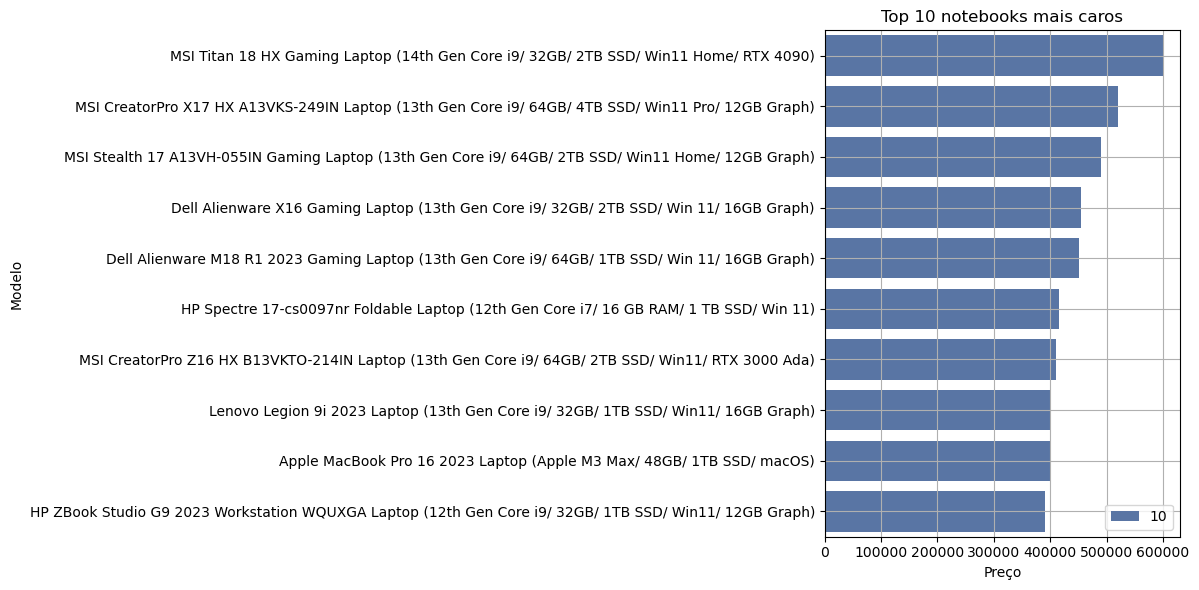

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Price',y='Model',data=top10_mais_caros,hue=10,palette="deep")
plt.title("Top 10 notebooks mais caros")
plt.xlabel("Preço")
plt.ylabel("Modelo")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
ssd_buckets = pd.cut(df['SSD_size'],bins=[0,256,512,1024,2048],labels=['<256','257-512','513-1TB','1TB>='])

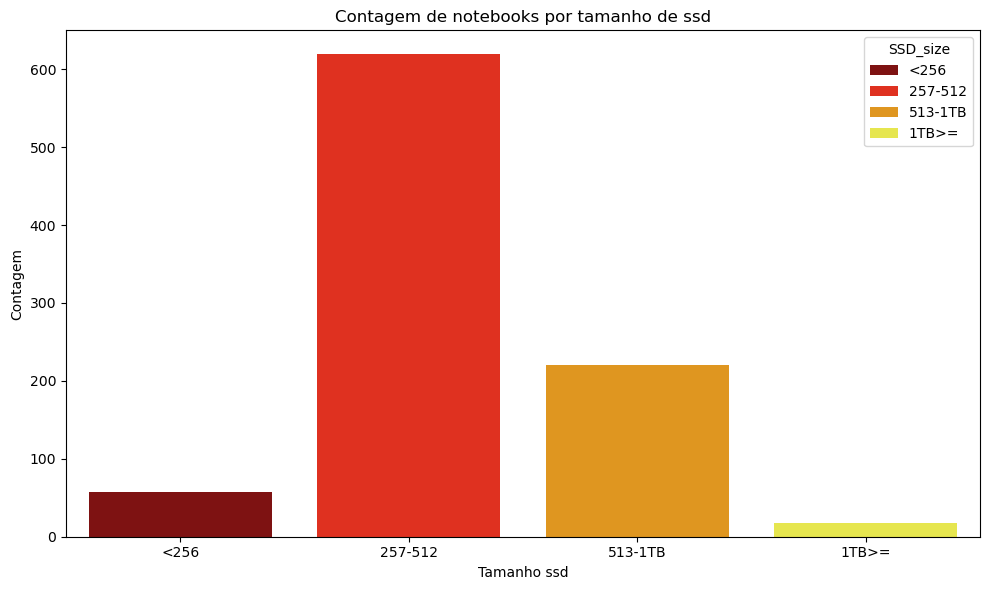

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=ssd_buckets,hue=ssd_buckets,palette="hot")
plt.title("Contagem de notebooks por tamanho de ssd")
plt.ylabel("Contagem")
plt.xlabel("Tamanho ssd")
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
corr = df[['Price','Ram_qtd','Processor_gen','SSD_size','Rating']]
corr = corr.corr()
corr

,Price,Ram_qtd,Processor_gen,SSD_size,Rating
Price,1.000000,0.177726,0.254244,0.624190,0.562655
Ram_qtd,0.177726,1.000000,0.081975,0.056176,0.125663
Processor_gen,0.254244,0.081975,1.000000,0.143592,-0.017378
SSD_size,0.624190,0.056176,0.143592,1.000000,0.406675
Rating,0.562655,0.125663,-0.017378,0.406675,1.000000


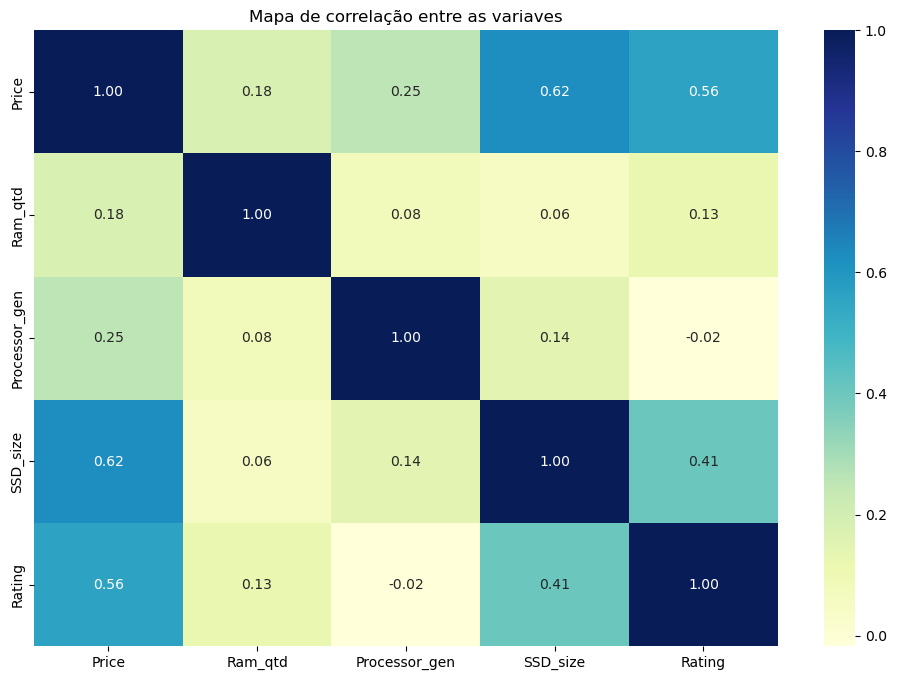

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="YlGnBu")
plt.title("Mapa de correlação entre as variaves")
plt.show()